<a href="https://colab.research.google.com/github/omachiokolo/AI_Tech_Datasets/blob/main/MachineLearning_in_Multi_label_Classification_For_CoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Tokenizers
import re
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential

# Diiferent ML algorithms
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
# metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
datapath = "/content/gdrive/MyDrive/Annotated_TrainSet.csv"
df = pd.read_csv(datapath)

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.head()

,Doc_id,Sent_index,Physician_notes,Appointment,Procedure,PatientCase_Instruction,Lab,Medication,Patient_Referral_Info,Imaging
0,45901,119,"['Neurosurgery', 'felt', 'the', 'patient', 'wa...",1,0,0,0,0,0,0
1,45901,138,"['8', '.', 'Outpatient', 'Lab', 'Work', 'Theop...",0,0,0,1,0,0,0
2,45901,143,"['Discharge', 'Disposition', ':', 'Home', 'Wit...",1,0,0,0,0,0,0
3,45901,144,"['Facility', ':']",1,0,0,0,0,0,0
4,45901,145,"['St', 'Francis-eastside', 'of', '1717', 'Cord...",1,0,0,0,0,0,0


In [ ]:
missing_values_check = df.isnull().sum()

In [ ]:
print(missing_values_check)

Doc_id                     0
Sent_index                 0
Physician_notes            0
Appointment                0
Procedure                  0
PatientCase_Instruction    0
Lab                        0
Medication                 0
Patient_Referral_Info      0
Imaging                    0
dtype: int64


In [ ]:
filter = df["Physician_notes"]!= ""
Phsician_comments = df[filter]
Phsician_comments = df.dropna()

In [ ]:
print(Phsician_comments["Physician_notes"][168])

['[', '**University/College', '23363**', ']']


In [ ]:
print("Appointment:" + str(Phsician_comments["Appointment"][168]))
print("Procedure:" + str(Phsician_comments["Procedure"][168]))
print("PatientCase_Instruction:" + str(Phsician_comments["PatientCase_Instruction"][168]))
print("Lab:" + str(Phsician_comments["Lab"][168]))
print("Medication:" + str(Phsician_comments["Medication"][168]))
print("Patient_Referral_Info:" + str(Phsician_comments["Patient_Referral_Info"][168]))
print("Imaging:" + str(Phsician_comments["Imaging"][168]))

Appointment:0
Procedure:0
PatientCase_Instruction:0
Lab:0
Medication:1
Patient_Referral_Info:1
Imaging:0


In [ ]:
Physician_labels_class = df[["Appointment", "Procedure", "PatientCase_Instruction", "Lab", "Medication", "Patient_Referral_Info", "Imaging"]]

In [ ]:
cols = df.columns
cols = list(df.columns)
labels_class = cols[3:]
num_labels = len(labels_class)
Clincial_notes = df['Physician_notes']
print('The notes for preprocessing: "\"', Clincial_notes[0])
print("\n")
print('Number of Labels are: ' ,num_labels)
print("\n")
print('The Labels or targets are: "\n"',labels_class)


The notes for preprocessing: "" ['Neurosurgery', 'felt', 'the', 'patient', 'was', 'stable', 'enough', 'to', 'f/u', 'as', 'an', 'opt', 'for', 'a', 'shunt', '.']


Number of Labels are:  7


The Labels or targets are: "
" ['Appointment', 'Procedure', 'PatientCase_Instruction', 'Lab', 'Medication', 'Patient_Referral_Info', 'Imaging']


In [ ]:
#Counting the number of notes in each label category
counts = []

for label in labels_class:
    counts.append((label, df[label].sum()))
df_count = pd.DataFrame(counts, columns=['Labels/class', 'number of notes'])

df_count

,Labels/class,number of notes
0,Appointment,340
1,Procedure,25
2,PatientCase_Instruction,781
3,Lab,70
4,Medication,151
5,Patient_Referral_Info,64
6,Imaging,17


<Axes: >

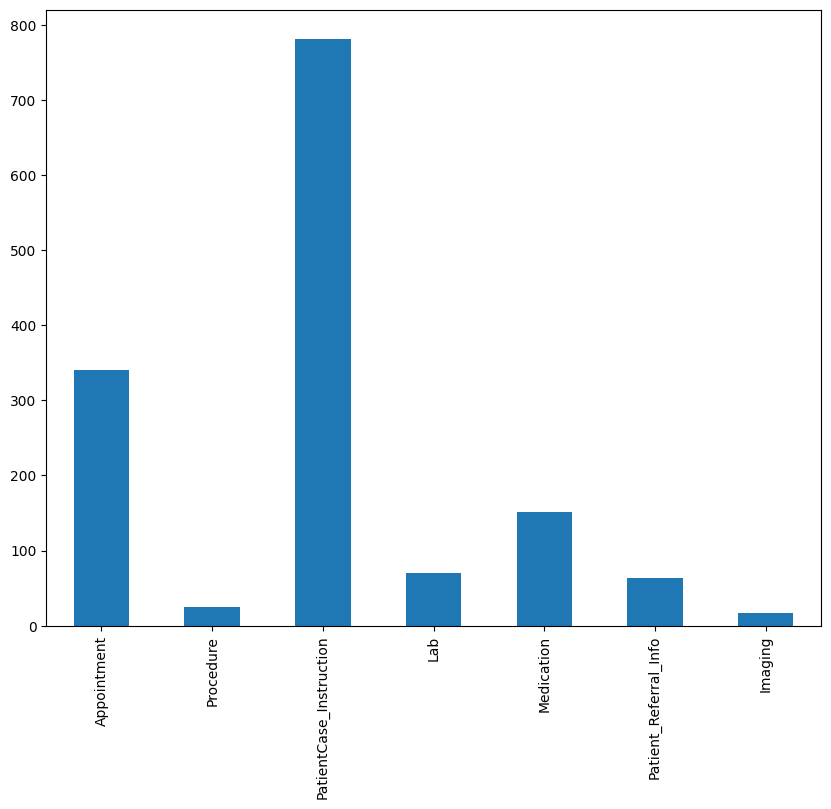

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Physician_labels_class.sum(axis=0).plot.bar()

<Axes: >

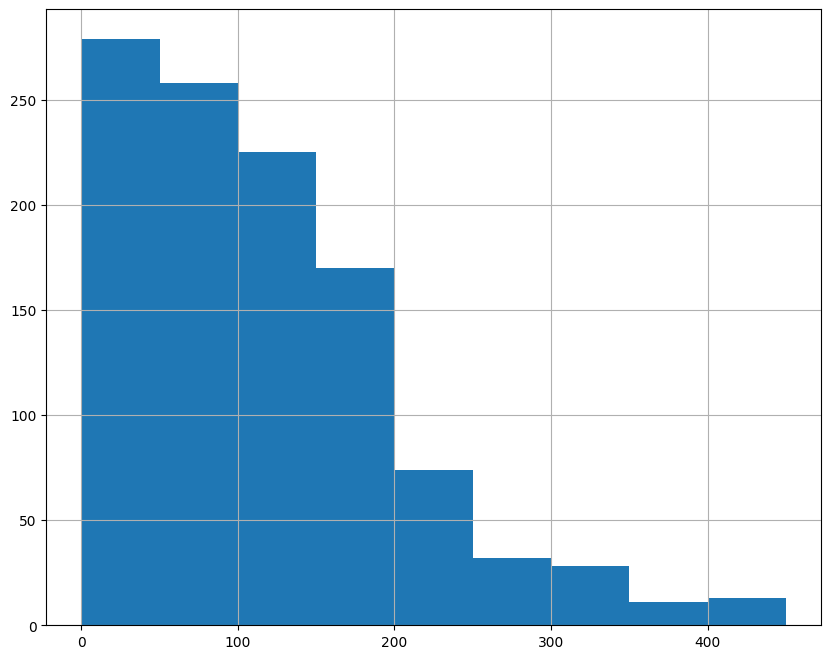

In [ ]:
lens = df['Physician_notes'].str.len()
lens.hist(bins = np.arange(0,500,50))

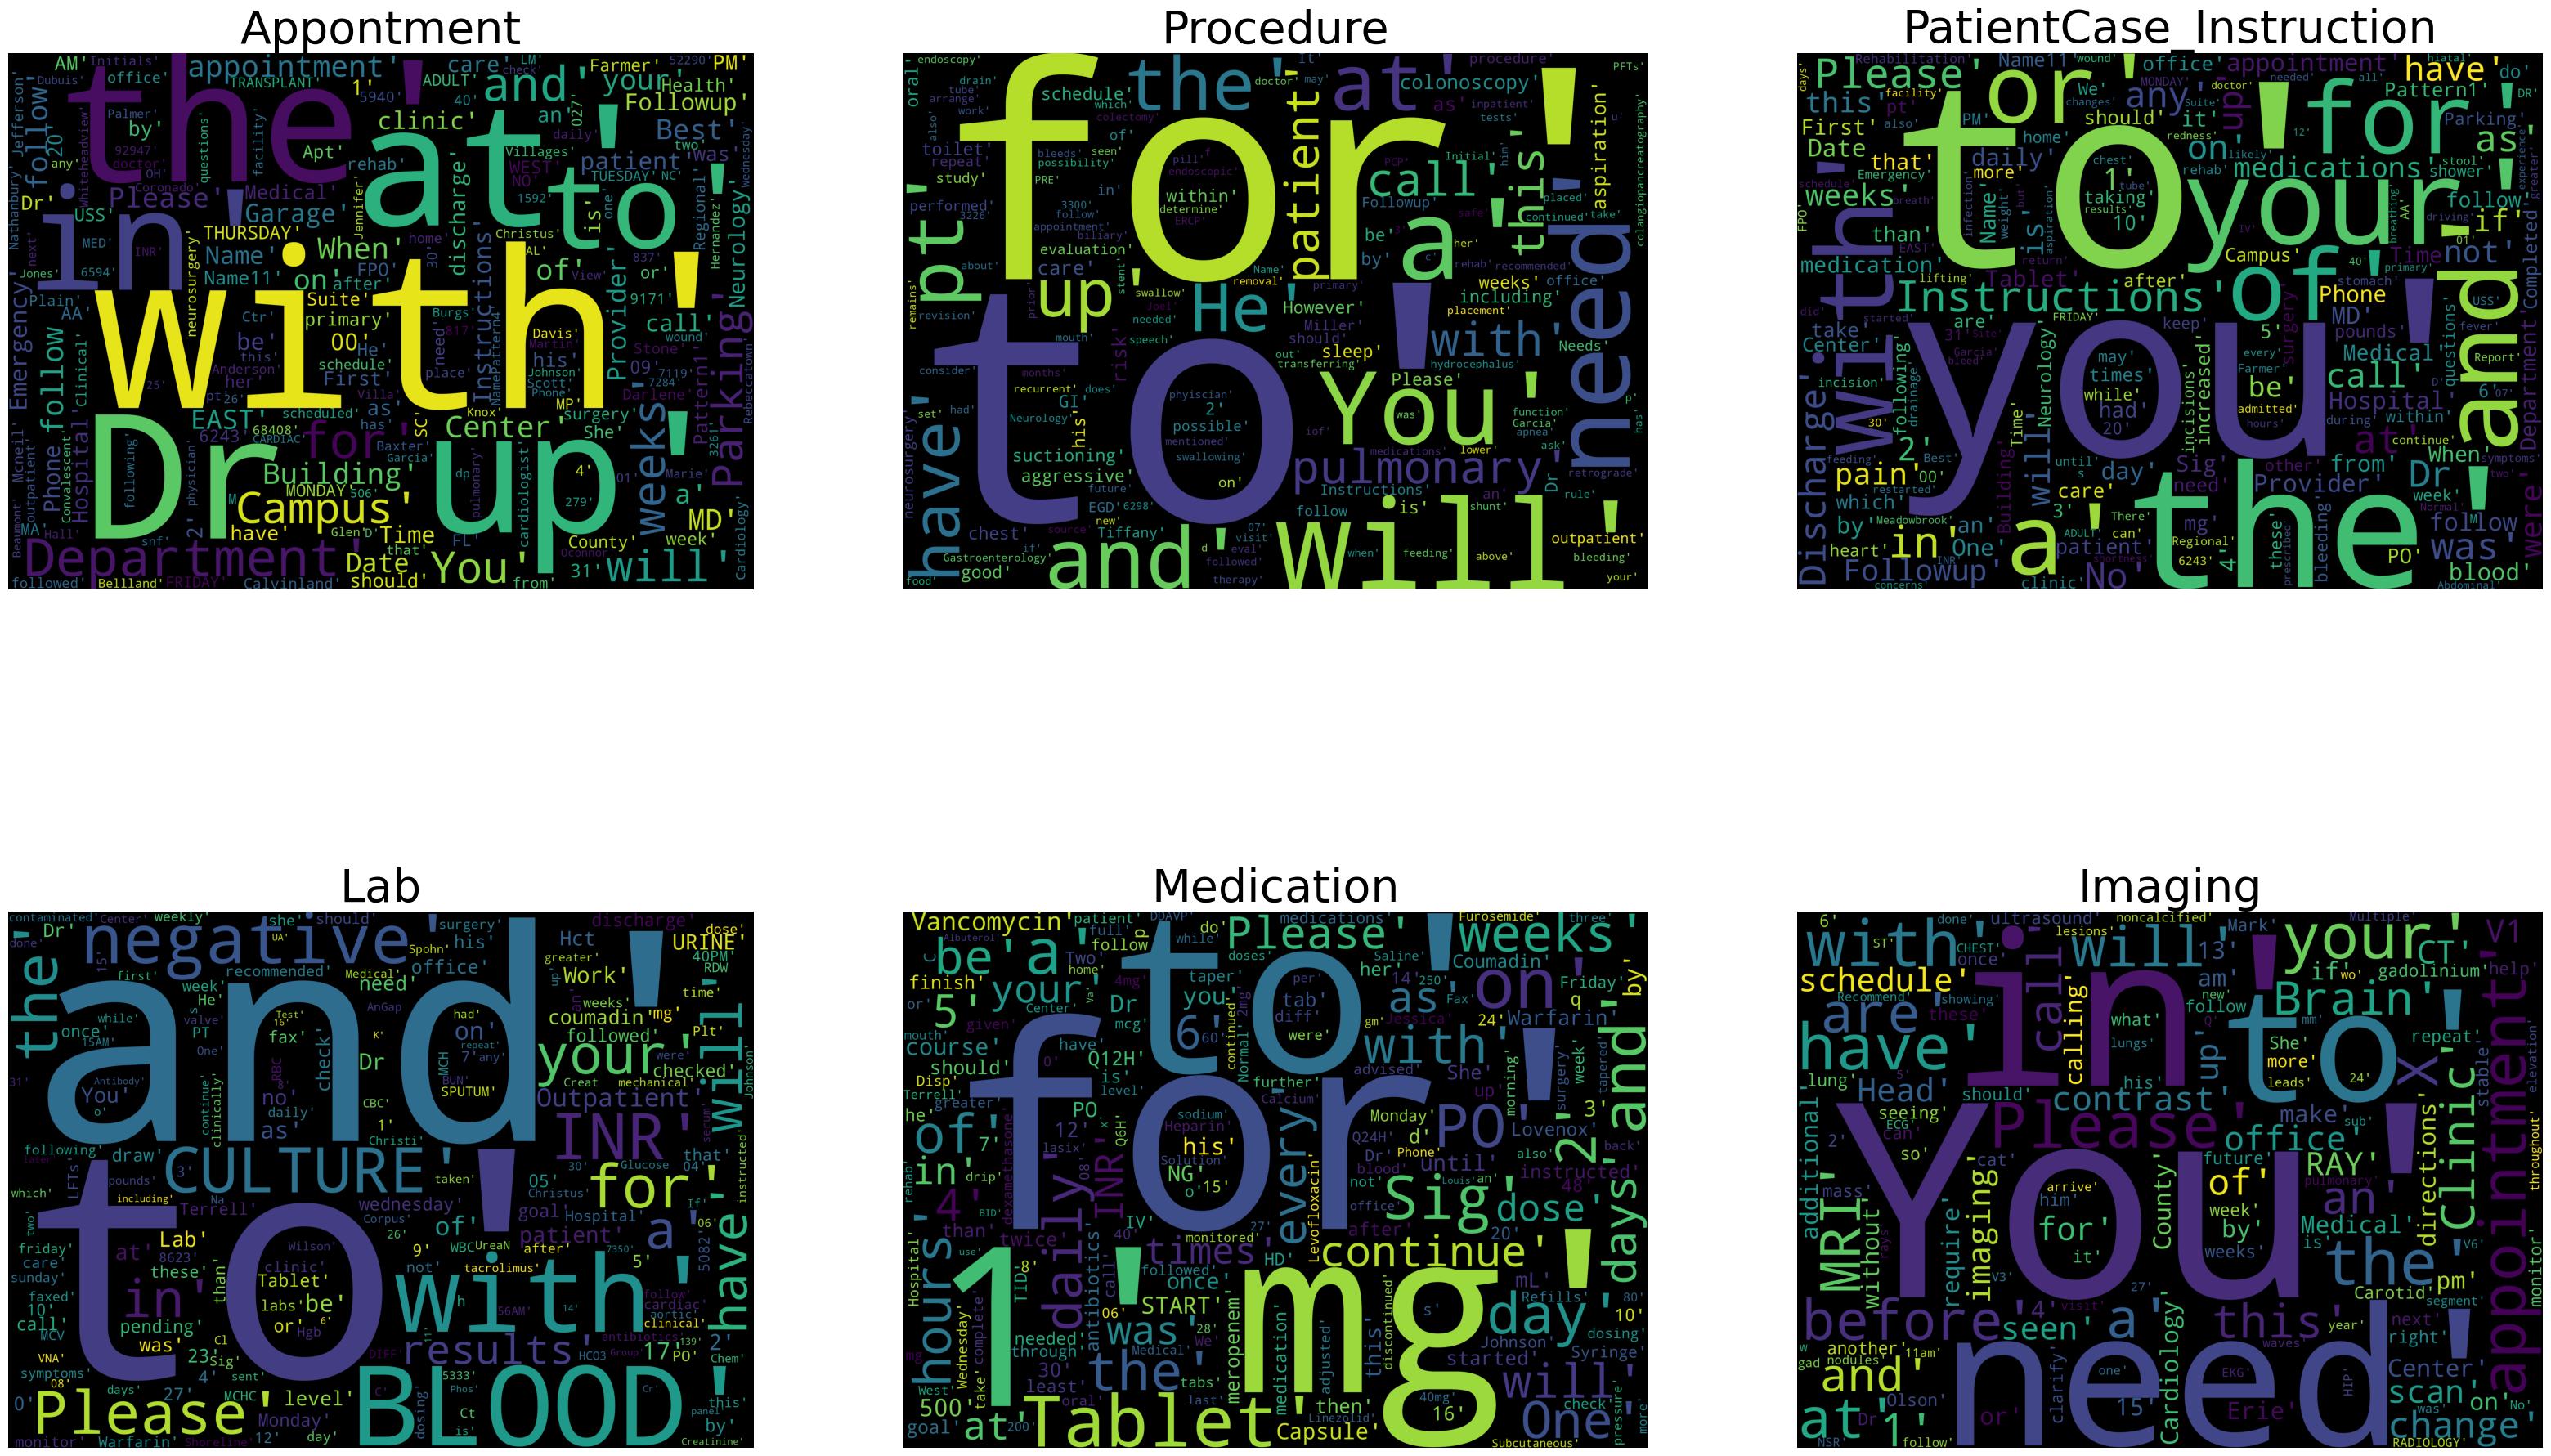

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# 1Appointment
subset = df[df.Appointment==1]
text = subset.Physician_notes.values
cloud_Appointment = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Appontment",fontsize=40)
plt.imshow(cloud_Appointment)


#2 procedure
subset = df[df.Procedure==1]
text = subset.Physician_notes.values
cloud_Procedure = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Procedure",fontsize=40)
plt.imshow(cloud_Procedure)


#3 patient instruction
subset = df[df.PatientCase_Instruction==1]
text = subset.Physician_notes.values
cloud_PatientCase_Instruction = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("PatientCase_Instruction",fontsize=40)
plt.imshow(cloud_PatientCase_Instruction)


# 4 lab
subset = df[df.Lab==1]
text = subset.Physician_notes.values
cloud_Lab = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Lab",fontsize=40)
plt.imshow(cloud_Lab)


# 5Medication
subset = df[df.Medication==1]
text = subset.Physician_notes.values
cloud_Medication = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Medication",fontsize=40)
plt.imshow(cloud_Medication)


# 6 Patient_Referral_Info
subset = df[df.Patient_Referral_Info==1]
text = subset.Physician_notes.values
cloud_Patient_Referral_Info = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Patient_Referral_Info",fontsize=40)
plt.imshow(cloud_Patient_Referral_Info)


#7 imaging
subset = df[df.Imaging==1]
text = subset.Physician_notes.values
cloud_Imaging = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Imaging",fontsize=40)
plt.imshow(cloud_Imaging)

plt.show()

In [ ]:

df['Physician_notes'][0]

"['Neurosurgery', 'felt', 'the', 'patient', 'was', 'stable', 'enough', 'to', 'f/u', 'as', 'an', 'opt', 'for', 'a', 'shunt', '.']"

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
df['Physician_notes'] = df['Physician_notes'].map(lambda com : clean_text(com))
df['Physician_notes'][0]


'neurosurgery felt the patient was table enough to f u as an opt for a hunt'

In [ ]:
Corpus = df['Physician_notes']

In [ ]:
tfidf = TfidfVectorizer()

NameError: ignored

In [ ]:
Physician_labels_class = df[["Appointment", "Procedure", "PatientCase_Instruction", "Lab", "Medication", "Patient_Referral_Info", "Imaging "]]


In [ ]:
Xfeatures = tfidf.fit_transform(Corpus).toarray()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(Xfeatures, Physician_labels_class, test_size=0.2,random_state=42)

NameError: ignored

# **K-Nearest Neighbor Algorithm Model**

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=42)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(X_test, y_test)
#nb_cm = confusion_matrix(y_test, y_pred)
nb_cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.57
Accuracy of  test set    : 0.54
Classification report for classifier KNeighborsClassifier(n_neighbors=42):
              precision    recall  f1-score   support

           0       0.73      0.50      0.60        72
           1       0.00      0.00      0.00         6
           2       0.79      0.94      0.86       159
           3       0.00      0.00      0.00         9
           4       0.67      0.17      0.27        24
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00         3

   micro avg       0.78      0.65      0.71       289
   macro avg       0.31      0.23      0.25       289
weighted avg       0.67      0.65      0.64       289
 samples avg       0.71      0.69      0.68       289




## **Decision Tree Classifier Model**

In [ ]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(X_test, y_test)
#nb_cm = confusion_matrix(y_test, y_pred)
nb_cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.96
Accuracy of  test set    : 0.61
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        72
           1       0.67      0.33      0.44         6
           2       0.82      0.92      0.87       159
           3       0.33      0.33      0.33         9
           4       0.71      0.50      0.59        24
           5       0.25      0.19      0.21        16
           6       0.00      0.00      0.00         3

   micro avg       0.74      0.69      0.71       289
   macro avg       0.50      0.39      0.43       289
weighted avg       0.73      0.69      0.70       289
 samples avg       0.76      0.73      0.73       289




# **Random Forest Classifier**

In [ ]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred, output_dict=False,
    target_names=['Appointment', 'Procedure', 'PatientCase_Instruction', 'Lab', 'Medication', 'Patient_Referral_Info', 'Imaging'])))
nb_score = model_RF.score(X_test, y_test)
#nb_cm = confusion_matrix(y_test, y_pred)
nb_cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.96
Accuracy of  test set    : 0.65
Classification report for classifier RandomForestClassifier(n_estimators=200):
                         precision    recall  f1-score   support

            Appointment       0.90      0.50      0.64        72
              Procedure       1.00      0.17      0.29         6
PatientCase_Instruction       0.81      0.98      0.89       159
                    Lab       1.00      0.11      0.20         9
             Medication       1.00      0.29      0.45        24
  Patient_Referral_Info       1.00      0.06      0.12        16
                Imaging       0.00      0.00      0.00         3

              micro avg       0.83      0.70      0.76       289
              macro avg       0.82      0.30      0.37       289
           weighted avg       0.86      0.70      0.71       289
            samples avg       0.78      0.74      0.75       289




# **Baseline Multi-label Random Forest Classification**

In [ ]:
# Train the random forest model using the imbalanced dataset
baseline_rf = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train, y_train)

# Baseline model prediction
y_test_pred_baseline = baseline_rf.predict(X_test)

# Take a look at the prediction
y_test_pred_baseline[:5]

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]])

In [ ]:
# Evaluation metrics
print('Accuracy of training set : {:.2f}'.format(model_RF.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(X_test, y_test)))
print(classification_report(y_test,y_test_pred_baseline))

Accuracy of training set : 0.96
Accuracy of  test set    : 0.66
              precision    recall  f1-score   support

           0       0.88      0.51      0.65        72
           1       1.00      0.17      0.29         6
           2       0.80      0.98      0.88       159
           3       1.00      0.11      0.20         9
           4       0.88      0.29      0.44        24
           5       1.00      0.06      0.12        16
           6       0.00      0.00      0.00         3

   micro avg       0.82      0.70      0.76       289
   macro avg       0.79      0.30      0.37       289
weighted avg       0.84      0.70      0.70       289
 samples avg       0.78      0.74      0.75       289



# **XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report


# create sample dataset
X, y = make_multilabel_classification(n_samples=300, n_features=10, n_classes=7, n_labels=1,
                                      allow_unlabeled=False, random_state=42)

# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# create XGBoost instance with default hyper-parameters
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic')

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_estimator)

# fit the model
multilabel_model.fit(X_train, y_train)

predictions = multilabel_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

# evaluate on test data
#print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, multilabel_model.predict(X_test))*100))

print("Accuracy:", accuracy*100)
print("\nClassification Report:")
print(classification_report(y_test, predictions)) #target_names=Physician_labels_class

precision_XGB = round(precision_score(y_test,predictions,average = 'macro'),2)
recall_XGB = round(recall_score(y_test,predictions, average = 'macro'),2)
f1_XGB = round(f1_score(y_test,predictions, average = 'macro'),2)
accuracy_XGB = round(accuracy_score(y_test,predictions),2)

Accuracy: 61.66666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.67      1.00      0.80        18
           2       1.00      1.00      1.00        20
           3       0.86      0.78      0.82        23
           4       1.00      0.17      0.29         6
           5       1.00      0.57      0.73         7
           6       1.00      0.50      0.67         2

   micro avg       0.83      0.83      0.83        88
   macro avg       0.90      0.71      0.73        88
weighted avg       0.87      0.83      0.81        88
 samples avg       0.87      0.88      0.85        88



# **Model Evaluation**

In [ ]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","XGBoost Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(X_test, y_test),model_DT.score(X_train, y_train),model_RF.score(X_train, y_train),accuracy], #(y_test, predictions)
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_XGB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_XGB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_XGB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_XGB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.538117,0.54,0.31,0.23,0.25
1,DecisionTree Classifier,0.959551,0.61,0.50,0.39,0.43
2,RandomForest Classifier,0.962921,0.66,0.82,0.31,0.37
3,XGBoost Classifier,0.616667,0.62,0.90,0.71,0.73


# **Model Performances Plotting**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = {'Metrics': ['Train_accuracy','Test_accuracy','Precision','Recall','F1_score'],
        'KNN': [0.54,0.54,0.31,0.23,0.25],
        'DecisionTree': [0.96,0.61,0.50,0.39,0.43],
        'RandomForest': [0.96,0.65,0.82,0.31,0.37],
        'XGBoost': [0.62,0.62,0.90,0.71,0.73]}
       # 'F1-Score': [0.25,0.43,0.37,0.73]}

df = pd.DataFrame(data)
df

,Metrics,KNN,DecisionTree,RandomForest,XGBoost
0,Train_accuracy,0.54,0.96,0.96,0.62
1,Test_accuracy,0.54,0.61,0.65,0.62
2,Precision,0.31,0.50,0.82,0.90
3,Recall,0.23,0.39,0.31,0.71
4,F1_score,0.25,0.43,0.37,0.73


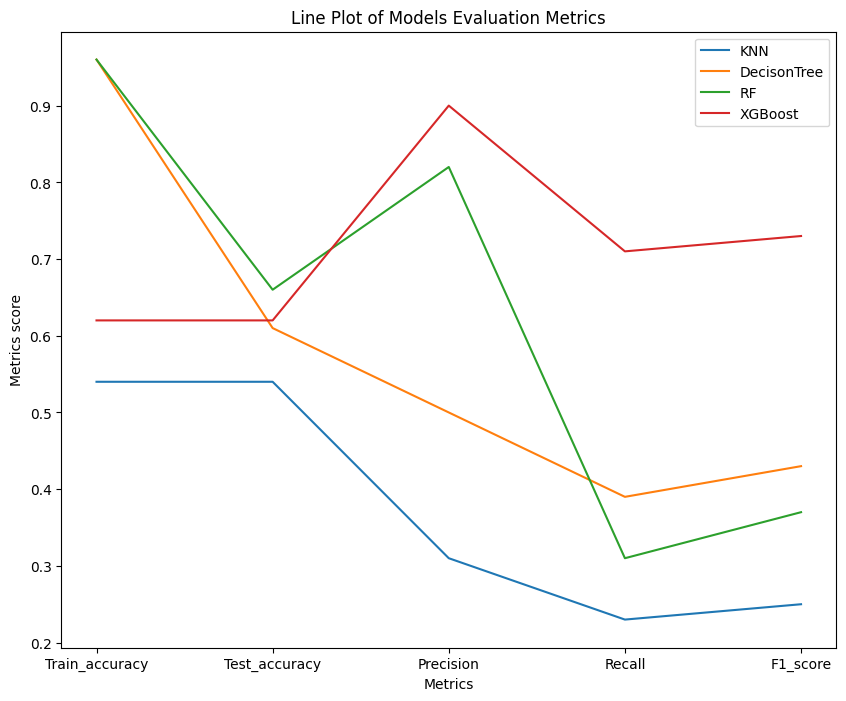

In [ ]:
Plot1 = plt.plot(df['Metrics'], df['KNN'])
Plot2 = plt.plot(df['Metrics'], df['DecisionTree'])
Plot3 = plt.plot(df['Metrics'], df['RandomForest'])
Plot4 = plt.plot(df['Metrics'], df['XGBoost'])
plt.xlabel('Metrics')
plt.ylabel('Metrics score')
plt.title('Line Plot of Models Evaluation Metrics')
plt.legend(['KNN','DecisonTree','RF','XGBoost'])
plt.show()

**One_Vs_Rest** **Algorithm**


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

In [ ]:
train_text = train['Physician_notes']
test_text = test['Physician_notes']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

In [ ]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Doc_id','Sent_index','Physician_notes'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Doc_id','Sent_index','Physician_notes'], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} Physician_notes...**'.format(category))

    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])

    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")